Expected portfolio return: 0.08%
Standard deviation of portfolio return: 0.69%
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<function matplotlib.pyplot.show(close=None, block=None)>

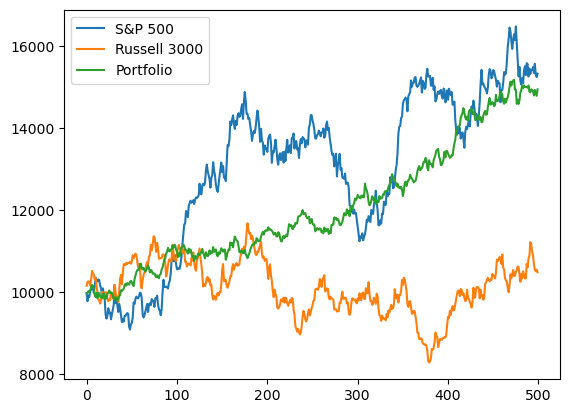

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
# Define the list of stock symbols and their allocations in the portfolio
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'JPM', 'JNJ', 'PG', 'KO']
allocations = [0.1] * 10  # Equal allocations for all stocks
initial_value = 10000
# Define the start and end dates for the historical data
start_date = '2018-05-02'
end_date = '2023-05-02'
# Pull historical data for each stock symbol using yfinance
hist_data = {}
for symbol in stocks:
    ticker = yf.Ticker(symbol)
    data = ticker.history(start=start_date, end=end_date)['Close']
    hist_data[symbol] = data
# Combine the historical data into a single dataframe
df = pd.DataFrame(hist_data)
# Calculate the daily returns of the stocks
returns = df.pct_change().dropna()
# Calculate the expected return and standard deviation of each stock
mu = returns.mean()
sigma = returns.std()
# Generate a set of random returns for each stock
num_sims = 500
sim_returns = np.random.normal(mu, sigma, size=(num_sims, len(stocks)))
# Calculate the total portfolio return for each set of random returns
port_returns = []
for sim in sim_returns:
    port_return = np.dot(sim, allocations)
    port_returns.append(port_return)
# Calculate the mean and standard deviation of the portfolio returns
mean_return = np.mean(port_returns)
std_return = np.std(port_returns)
# Print the expected return and standard deviation of the portfolio
print("Expected portfolio return: {:.2f}%".format(mean_return * 100))
print("Standard deviation of portfolio return: {:.2f}%".format(std_return * 100))
# Pull historical data for the S&P 500 and Russell 3000 indices
spy_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']
russell_data = yf.download('^RUA', start=start_date, end=end_date)['Adj Close']
# Calculate the daily returns of the S&P 500 and Russell 3000 indices
spy_returns = spy_data.pct_change().dropna()
russell_returns = russell_data.pct_change().dropna()
# Calculate the expected return and standard deviation of each index
spy_mu = spy_returns.mean()
spy_sigma = spy_returns.std()
russell_mu = russell_returns.mean()
russell_sigma = russell_returns.std()
# Generate a set of random returns for each index
spy_sim_returns = np.random.normal(spy_mu, spy_sigma, size=num_sims)
russell_sim_returns = np.random.normal(russell_mu, russell_sigma, size=num_sims)
# Calculate the total value of the S&P 500 and Russell 3000 indices
spy_value = (spy_sim_returns + 1).cumprod() * initial_value
russell_value = (russell_sim_returns + 1).cumprod() * initial_value
# Calculate the total value of the portfolio
port_value = (np.array(port_returns) + 1).cumprod() * initial_value
# Plot the total value of the S&P 500, Russell 3000, and portfolio
import matplotlib.pyplot as plt
plt.plot(spy_value, label='S&P 500')
plt.plot(russell_value, label='Russell 3000')
plt.plot(port_value, label='Portfolio')
plt.legend()
plt.show

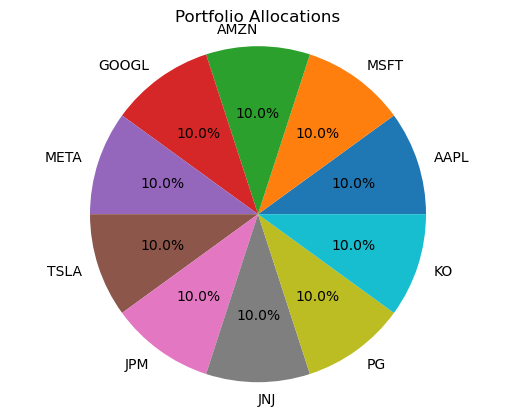

In [2]:
plt.pie(allocations, labels=stocks, autopct='%1.1f%%')
plt.title('Portfolio Allocations')
plt.axis('equal')
plt.show()